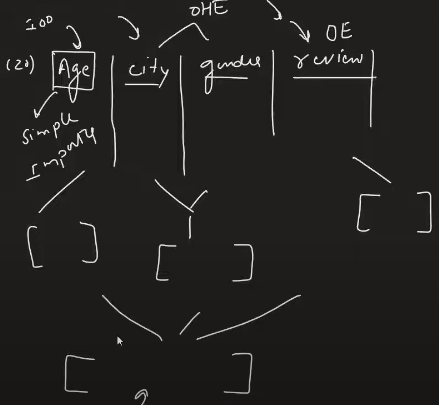

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv('covid_toy.csv')

In [4]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [11]:
df['city'].value_counts()

,count
city,
Kolkata,32
Bangalore,30
Delhi,22
Mumbai,16


In [5]:
df.isnull().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['has_covid']),df['has_covid'],
                                                test_size=0.2)

In [7]:
X_train

,age,gender,fever,cough,city
54,60,Female,99.0,Mild,Mumbai
78,11,Male,100.0,Mild,Bangalore
65,69,Female,102.0,Mild,Bangalore
66,51,Male,104.0,Mild,Kolkata
85,16,Female,103.0,Mild,Bangalore
...,...,...,...,...,...
50,19,Male,101.0,Mild,Delhi
21,73,Male,98.0,Mild,Bangalore
55,81,Female,101.0,Mild,Mumbai
99,10,Female,98.0,Strong,Kolkata


## 1. Not use Transformer

In [13]:
# adding simple imputer to fever col
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data
X_test_fever = si.fit_transform(X_test[['fever']])
X_train_fever
# X_train_fever.shape

array([[ 99.        ],
       [100.        ],
       [102.        ],
       [104.        ],
       [103.        ],
       [101.        ],
       [101.        ],
       [101.        ],
       [ 98.        ],
       [100.98630137],
       [102.        ],
       [102.        ],
       [ 98.        ],
       [104.        ],
       [104.        ],
       [100.98630137],
       [104.        ],
       [101.        ],
       [104.        ],
       [100.        ],
       [ 99.        ],
       [102.        ],
       [101.        ],
       [102.        ],
       [104.        ],
       [103.        ],
       [ 99.        ],
       [103.        ],
       [101.        ],
       [100.        ],
       [ 98.        ],
       [ 98.        ],
       [104.        ],
       [101.        ],
       [ 99.        ],
       [ 98.        ],
       [102.        ],
       [103.        ],
       [ 98.        ],
       [ 98.        ],
       [103.        ],
       [102.        ],
       [101.        ],
       [104

In [14]:
# Ordinalencoding -> cough
oe = OrdinalEncoder(categories=[['Mild','Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data
X_test_cough = oe.fit_transform(X_test[['cough']])
# X_train_cough.shape
X_train_cough

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [17]:
# OneHotEncoding -> gender,city
ohe = OneHotEncoder(drop='first',sparse_output=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data
X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

# X_train_gender_city.shape
X_train_gender_city

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 1.],


In [18]:
# Extracting Age
X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data
X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age
# X_train_age.shape

array([[60],
       [11],
       [69],
       [51],
       [16],
       [14],
       [83],
       [19],
       [80],
       [23],
       [82],
       [ 5],
       [71],
       [25],
       [42],
       [84],
       [18],
       [20],
       [17],
       [ 5],
       [65],
       [64],
       [15],
       [82],
       [51],
       [48],
       [22],
       [83],
       [49],
       [47],
       [65],
       [31],
       [12],
       [ 8],
       [49],
       [24],
       [20],
       [60],
       [34],
       [69],
       [50],
       [33],
       [51],
       [56],
       [71],
       [13],
       [16],
       [80],
       [59],
       [19],
       [ 5],
       [14],
       [66],
       [72],
       [12],
       [38],
       [73],
       [75],
       [34],
       [44],
       [75],
       [64],
       [49],
       [26],
       [ 6],
       [69],
       [27],
       [70],
       [42],
       [34],
       [74],
       [64],
       [82],
       [10],
       [81],
       [19],
       [73],

In [19]:
X_train_transformed = np.concatenate((X_train_age,X_train_fever,X_train_gender_city,X_train_cough),axis=1)
# also the test data
X_test_transformed = np.concatenate((X_test_age,X_test_fever,X_test_gender_city,X_test_cough),axis=1)

X_train_transformed.shape

(80, 7)

## Mentos Zindagi

In [20]:
from sklearn.compose import ColumnTransformer

In [23]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(categories=[['Mild','Strong']]),['cough']),
    ('tnf3',OneHotEncoder(sparse_output=False,drop='first'),['gender','city'])
],remainder='passthrough')

In [24]:
transformer.fit_transform(X_train).shape

(80, 7)

In [26]:
transformer.fit_transform(X_train)

array([[ 99.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  60.        ],
       [100.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  11.        ],
       [102.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  69.        ],
       [104.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  51.        ],
       [103.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  16.        ],
       [101.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   0.        ,  14.        ],
       [101.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  83.        ],
       [101.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  19.        ],
       [ 98.        ,   0.        ,   0.        ,   1.        ,
          0.    

In [25]:
transformer.transform(X_test).shape

(20, 7)